# Moment Interaction Diagram

This example demonstrates how to generate moment interaction diagrams. We start by importing the necessary modules.

In [1]:
import numpy as np
from concreteproperties.material import Concrete, Steel
from concreteproperties.stress_strain_profile import (
    ConcreteLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
)
from sectionproperties.pre.library.concrete_sections import concrete_rectangular_section
from concreteproperties.concrete_section import ConcreteSection
from concreteproperties.results import MomentInteractionResults

## Assign Materials
The materials used in this example will be 32 MPa concrete and 500 MPa steel, specified in accordance with AS 3600:2018.

In [2]:
concrete = Concrete(
    name="32 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=30.1e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=32,
        alpha=0.802,
        gamma=0.89,
        ultimate_strain=0.003,
    ),
    alpha_squash=0.85,
    flexural_tensile_strength=3.4,
    colour="lightgrey",
)

steel = Steel(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

## Create Geometry and Concrete Section
The geometry used in this example is identical to that used in [Calculating Area Properties](area_properties.ipynb#Create-Geometry-and-Concrete-Section).

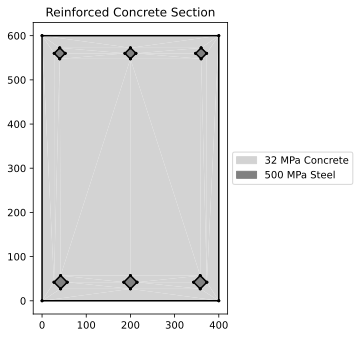

<AxesSubplot:title={'center':'Reinforced Concrete Section'}>

In [3]:
geom = concrete_rectangular_section(
    b=400,
    d=600,
    dia_top=20,
    n_top=3,
    dia_bot=24,
    n_bot=3,
    n_circle=4,
    cover=30,
    area_top=310,
    area_bot=450,
    conc_mat=concrete,
    steel_mat=steel,
)

conc_sec = ConcreteSection(geom)
conc_sec.plot_section()

## Moment Interaction Diagram
We perform a moment interaction analysis by calling the ``moment_interaction_diagram()`` method.

In [4]:
mi_res = conc_sec.moment_interaction_diagram()

Output()

We can plot the moment interaction diagram by calling the ``plot_diagram()`` method.

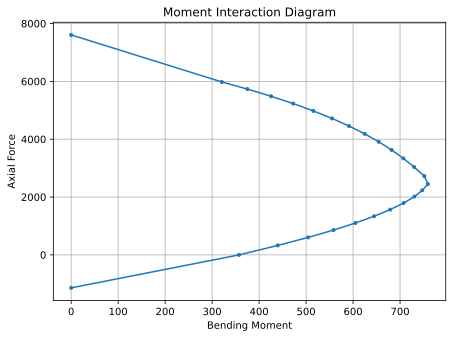

<AxesSubplot:title={'center':'Moment Interaction Diagram'}, xlabel='Bending Moment', ylabel='Axial Force'>

In [5]:
mi_res.plot_diagram()

What if we knew that we had equal bending moments about the ``x`` and ``y`` axis? In this case the neutral axis angle would be $\theta = \pi / 2$. Let's generate a moment interaction diagram for this case.

Output()

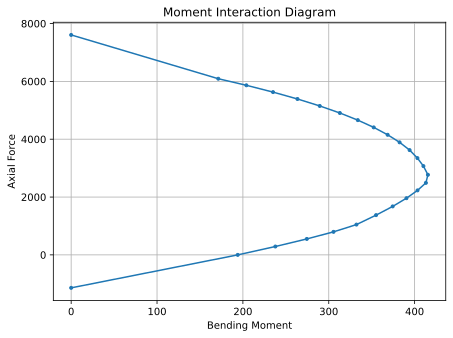

<AxesSubplot:title={'center':'Moment Interaction Diagram'}, xlabel='Bending Moment', ylabel='Axial Force'>

In [6]:
mi_res = conc_sec.moment_interaction_diagram(theta=np.pi / 2)
mi_res.plot_diagram()

It's also possible to plot a diagram for positive and negative bending (sagging and hogging). We do this by setting the parameter ``m_neg=True``. We can control the number of points between the pure bending point and decompression point by modifying the parameter ``n_points``.

Output()

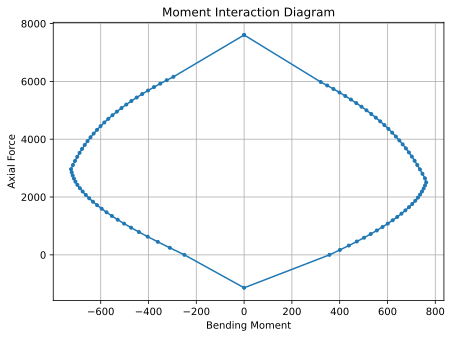

<AxesSubplot:title={'center':'Moment Interaction Diagram'}, xlabel='Bending Moment', ylabel='Axial Force'>

In [7]:
mi_res = conc_sec.moment_interaction_diagram(m_neg=True, n_points=48)
mi_res.plot_diagram()

In the above plot the bending capacity is higher for positive bending and not symmetric. This is because the bottom bars (3N24) provide more area than the top bars (3N20).

## Plotting Multiple Diagrams
We can also plot multiple diagrams at once by using the ``MomentInteractionResults.plot_multiple_diagrams()`` class method. In this example we'll create four different reinforced concrete cross-sections with different reinforcement ratios.

In [8]:
# create lists to hold results and labels
mi_results = []
labels = []

# create four different sections with increasing reinforcement
# and peform a moment interaction analysis
for idx in range(4):
    geom = concrete_rectangular_section(
        b=400,
        d=600,
        dia_top=16,
        n_top=6,
        dia_bot=16,
        n_bot=6,
        n_circle=4,
        cover=66,
        area_top=200 * (idx + 1),
        area_bot=200 * (idx + 1),
        conc_mat=concrete,
        steel_mat=steel,
    )

    conc_sec = ConcreteSection(geom)
    mi_results.append(conc_sec.moment_interaction_diagram())
    labels.append("p = {0}".format(0.01 * (idx + 1)))

Output()

Output()

Output()

Output()

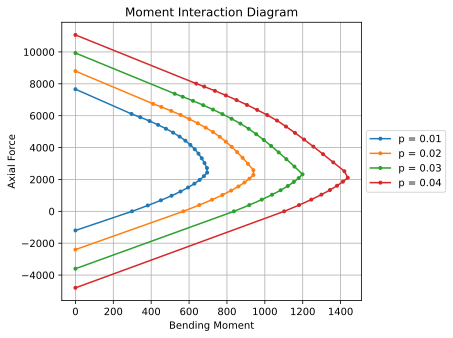

<AxesSubplot:title={'center':'Moment Interaction Diagram'}, xlabel='Bending Moment', ylabel='Axial Force'>

In [9]:
# plot all the diagrams on one image
MomentInteractionResults.plot_multiple_diagrams(
    moment_interaction_results=mi_results, labels=labels
)